In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r"C:\Users\User\Documents\com.moodle.moodlemobile\sites\afd84929a07dc1fee3b8b00ee7458690\filepool\car_age_price_f9eb535d00ee44e9908a39cceb9117f7.csv")

In [3]:
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


# Head

In [4]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


# Summary of data set

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


# Find the null values of the data set

In [6]:
data.isnull().sum()

Year     0
Price    0
dtype: int64

In [7]:
corr_matrix=data.corr()

In [8]:
corr=data.corr()
corr.Price.sort_values(ascending=False).head()

Price    1.000000
Year     0.776302
Name: Price, dtype: float64

# Plotting correlations on a heatmap

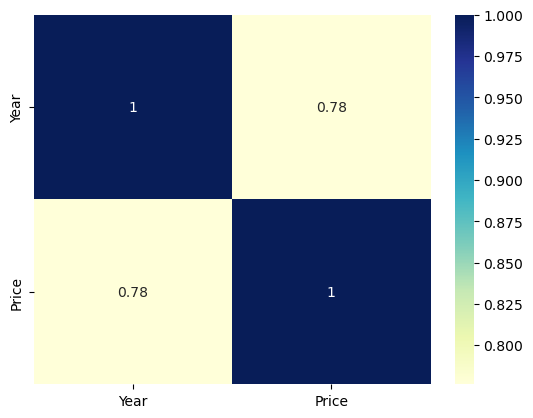

In [9]:
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

There is a correlation between price and year

In [10]:
x= data.drop(['Price'],axis=1)
y=data['Price']

In [11]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [12]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [15]:
x_train

,Year
66,2017
90,2017
62,2017
22,2015
85,2015
...,...
106,2015
14,2017
92,2017
51,2018


In [16]:
y_train

66     525000
90     520000
62     540000
22     434999
85     320000
        ...  
106    300000
14     475000
92     520000
51     550000
102    350000
Name: Price, Length: 89, dtype: int64

In [17]:
x_test

,Year
40,2019
65,2017
4,2018
47,2018
42,2018
69,2015
26,2017
11,2018
10,2019
44,2019


In [18]:
y_test

40     525000
65     495000
4      465000
47     450000
42     550000
69     300000
26     550000
11     500000
10     500000
44     550000
73     320000
55     550000
68     465000
97     640000
0      465000
18     500000
53     345000
80     390000
103    375000
91     520000
36     550000
12     500000
31     550000
Name: Price, dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
model=lin_regressor.fit(x_train,y_train)

In [20]:
predictions=model.predict(x_test)

In [21]:
from sklearn.metrics import mean_squared_error,r2_score
print('MSE= ', mean_squared_error(y_test,predictions))
print('R squared value= ',r2_score(y_test,predictions))

MSE=  4326906256.829671
R squared value=  0.36759313425902185


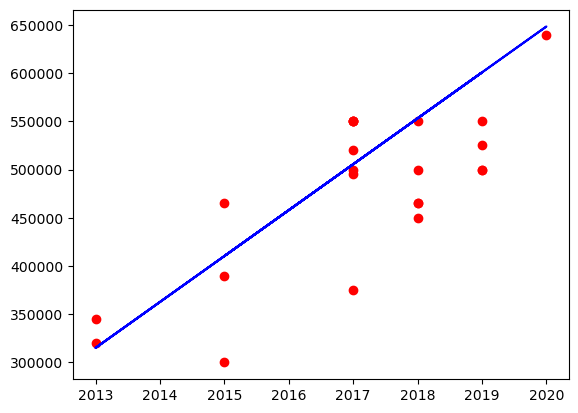

In [22]:
y_pred=model.predict(x_test)
plt.scatter(x_test,y_test,color='r')
plt.plot(x_test,y_pred,color='b')
plt.show()

The low accuracy score suggests that reggressive model has not fit very well with the existing data.The data is not suitable for linear regression.

In [23]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
rmse = mean_squared_error(y_test,predictions,squared= False)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

MAE: 53534.77957001264
MSE: 4326906256.829671
RMSE: 65779.22359552195


# Lasso regrassion

In [34]:
target_year = [[2022]]
pred_year = model.predict(target_year)

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [35]:
print('Predicted Price of a car in 2022:',pred_year)

Predicted Price of a car in 2022: [743601.61594504]
